# 電表的電力資訊

----
## 1> import modules


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 2> Data Reading

In [2]:
base_path = './pm_data/'

In [3]:
ffn = base_path+'farm1_2023-04-01.csv'

df = pd.read_csv(ffn)

df

,dtime,total_e,v1,v2,v3,a1,a2,a3
0,2023-04-01 00:09:00,5694.095,234.019,228.028,239.127,0.366,0.361,0.042
1,2023-04-01 00:19:00,5694.101,232.769,227.893,238.799,0.367,0.362,0.039
2,2023-04-01 00:30:00,5694.106,233.641,228.415,238.940,0.367,0.362,0.040
3,2023-04-01 00:40:00,5694.111,233.432,227.803,238.924,0.367,0.361,0.041
4,2023-04-01 00:50:00,5694.117,233.393,228.543,239.128,0.369,0.365,0.040
...,...,...,...,...,...,...,...,...
138,2023-04-01 23:10:00,5694.927,239.272,225.234,238.942,0.379,0.372,0.041
139,2023-04-01 23:20:00,5694.933,240.739,226.376,239.749,0.379,0.374,0.042
140,2023-04-01 23:30:00,5694.938,241.269,226.715,240.807,0.374,0.367,0.041
141,2023-04-01 23:40:00,5694.944,242.365,227.796,241.598,0.375,0.369,0.042


### 2.1> 來看一下用電趨勢

<AxesSubplot:xlabel='dtime'>

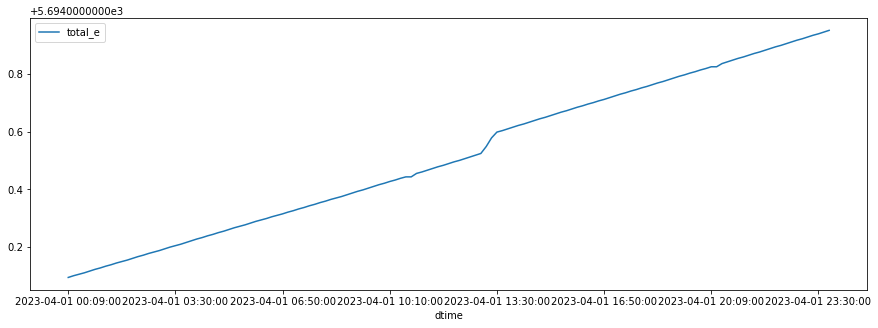

In [4]:
df_day = df.pivot_table(index='dtime',values='total_e')
df_day.plot(figsize=(15,5))

<AxesSubplot:xlabel='dtime'>

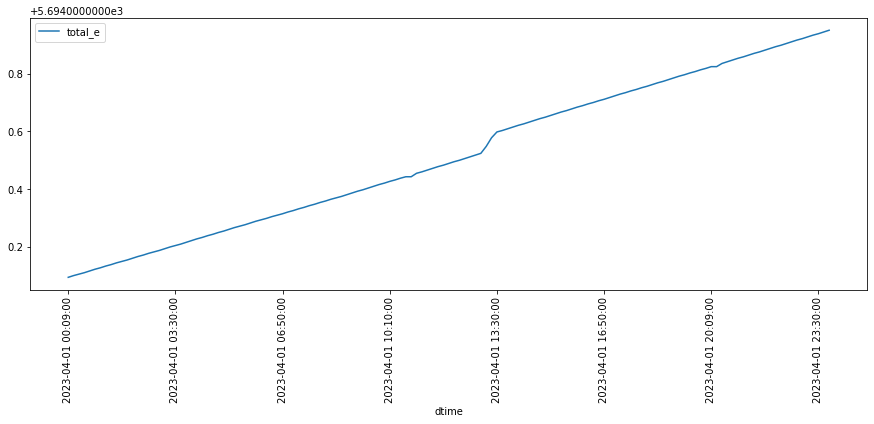

In [5]:
df_day = df.pivot_table(index='dtime',values='total_e')
df_day.plot(figsize=(15,5), rot=90)

- 以小時 resample 再重新畫過

In [6]:
df_day = df.pivot_table(index='dtime',values='total_e')
df_day.index= pd.to_datetime(df_day.index)
df_day.resample('H').max()

,total_e
dtime,
2023-04-01 00:00:00,5694.117
2023-04-01 01:00:00,5694.150
2023-04-01 02:00:00,5694.183
2023-04-01 03:00:00,5694.216
2023-04-01 04:00:00,5694.250
2023-04-01 05:00:00,5694.283
2023-04-01 06:00:00,5694.315
2023-04-01 07:00:00,5694.348
2023-04-01 08:00:00,5694.381


<AxesSubplot:xlabel='dtime'>

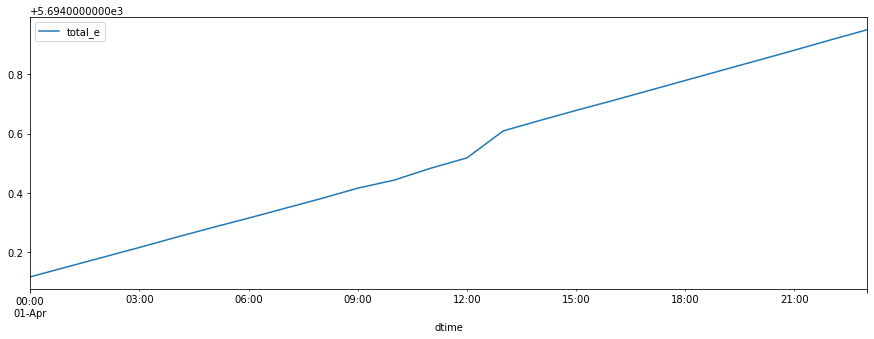

In [7]:
df_day = df.pivot_table(index='dtime',values='total_e')
df_day.index= pd.to_datetime(df_day.index)
df_day.resample('H').max().plot(figsize=(15,5))


In [8]:
### 2.2> 需要美化一下時，引入seaborn

In [9]:
import seaborn as sns; sns.set()

<AxesSubplot:xlabel='dtime'>

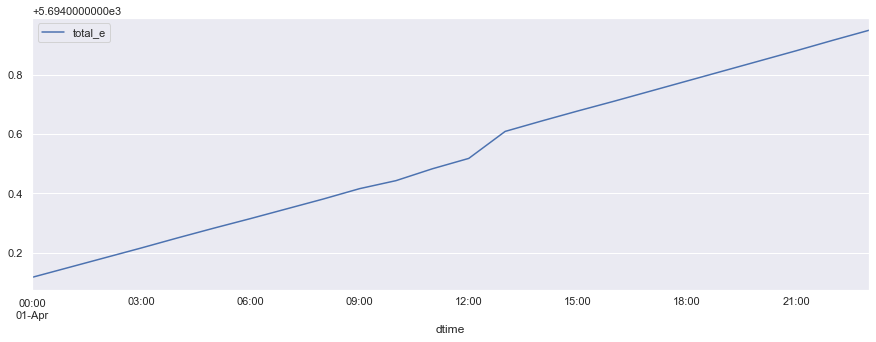

In [10]:
df_day = df.pivot_table(index='dtime',values='total_e')
df_day.index= pd.to_datetime(df_day.index)
df_day.resample('H').max().plot(figsize=(15,5))


### 使用差值來畫圖，得知每一段時間用多少電量

In [11]:
df_day = df.pivot_table(index='dtime',values='total_e')
df_day.index= pd.to_datetime(df_day.index)
df_day_24h = df_day.resample('H').max()
df_day_24h = df_day_24h.rolling(window=2).apply(lambda df_day: df_day.iloc[1] - df_day.iloc[0])
df_day_24h

,total_e
dtime,
2023-04-01 00:00:00,NaN
2023-04-01 01:00:00,0.033
2023-04-01 02:00:00,0.033
2023-04-01 03:00:00,0.033
2023-04-01 04:00:00,0.034
2023-04-01 05:00:00,0.033
2023-04-01 06:00:00,0.032
2023-04-01 07:00:00,0.033
2023-04-01 08:00:00,0.033


<AxesSubplot:xlabel='dtime'>

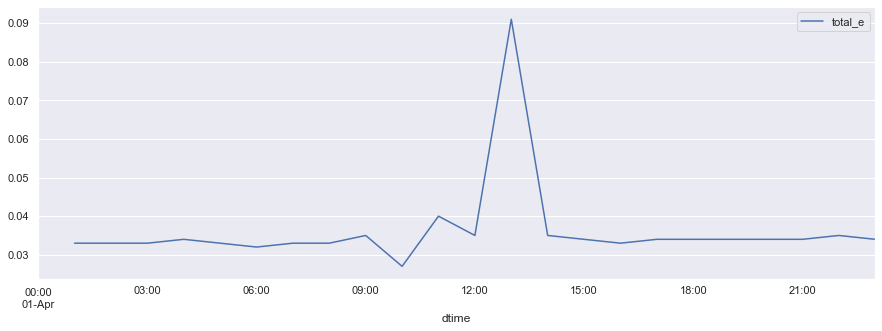

In [12]:
df_day_24h.plot(figsize=(15,5))

## 改用github上的資料，比較方便colab操作

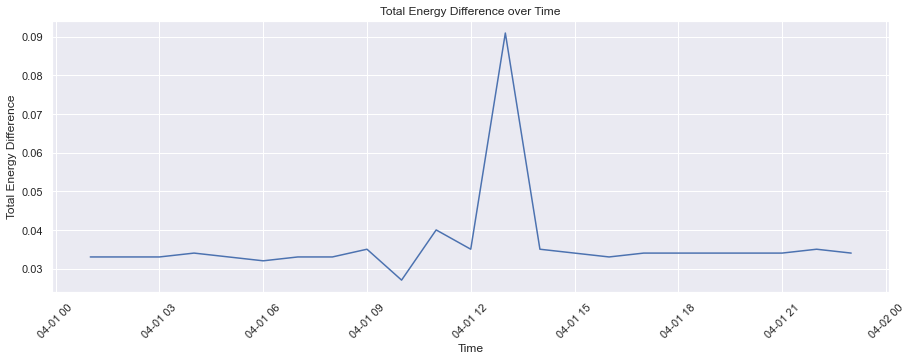

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 從URL讀取CSV文件
url = 'https://raw.githubusercontent.com/maloyang/hub202306-iot/main/pm_data/farm1_2023-04-01.csv'
df = pd.read_csv(url)

# 將時間欄位轉換為日期時間格式
df['dtime'] = pd.to_datetime(df['dtime'])

# 以每小時為間隔重取樣
df_resampled = df.set_index('dtime').resample('1H').last().reset_index()

# 計算每筆資料與前一筆資料的差值
df_resampled['total_e_diff'] = df_resampled['total_e'].diff()

# 輸出處理後的資料
#print(df_resampled.head())

# 設定圖的大小
plt.figure(figsize=(15, 5))

# 繪製線圖
plt.plot(df_resampled['dtime'], df_resampled['total_e_diff'])
plt.xlabel('Time')
plt.ylabel('Total Energy Difference')
plt.title('Total Energy Difference over Time')
plt.xticks(rotation=45)  # 將x軸刻度旋轉以避免重疊
plt.show()
